In [106]:
import os

In [107]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [108]:
paths = {
    'WORKSPACE_PATH': os.path.join('CheapestProduct', 'workspace'),
    'SCRIPTS_PATH': os.path.join('CheapestProduct','scripts'),
    'APIMODEL_PATH': os.path.join('CheapestProduct','models'),
    'ANNOTATION_PATH': os.path.join('CheapestProduct', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('CheapestProduct', 'workspace','images'),
    'MODEL_PATH': os.path.join('CheapestProduct', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('CheapestProduct', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('CheapestProduct', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('CheapestProduct', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('CheapestProduct', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('CheapestProduct', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('CheapestProduct','protoc')
 }

In [109]:
files = {
    'PIPELINE_CONFIG':os.path.join('CheapestProduct', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [110]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [111]:
import wget

In [112]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [58]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    # !apt-get install protobuf-compiler
    !cd CheapestProduct/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Processing /home/luca/source/ai/project/CheapestProduct/models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1686666 sha256=5996d143f0ecec25d8aa82d08b5d153cdfa53d36acd7bb02399121678fdec659
  Stored in directory: /tmp/pip-ephem-wheel-cache-9g5g6smm/wheels/0c/92/fd/99669c96c9f3185dfe232dcdbdeef48fc1d08774a7c4b36797
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [59]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-03-30 10:43:00.465446: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-30 10:43:00.465493: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (luca-Lenovo-ideapad-530S-15IKB): /proc/driver/nvidia/version does not exist
Running tests under Python 3.8.10: /home/luca/source/ai/project/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-03-30 10:43:00.475819: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/luca/source/ai/project/tfod/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: 

In [113]:
import object_detection

In [114]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
apache-beam                   2.37.0
asttokens                     2.0.5
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    5.0.0
certifi                       2021.10.8
charset-normalizer            2.0.12
cloudpickle                   2.0.0
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.28
debugpy                       1.5.1
decorator                     5.1.1
dill                          0.3.1.1
dm-tree                       0.1.6
docopt                        0.6.2
entrypoints                   0.4
executing                     0.8.3
fastavro                      1.4.10
flatbuffers                   2.0
fonttools                     4.31.2
gas

In [115]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-03-30 12:12:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.168.240, 2a00:1450:400e:80d::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.168.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  14,8MB/s    in 1,3s    

2022-03-30 12:12:31 (14,8 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_

In [116]:
labels = [{'name':'Mango', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [117]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [118]:
paths

{'WORKSPACE_PATH': 'CheapestProduct/workspace',
 'SCRIPTS_PATH': 'CheapestProduct/scripts',
 'APIMODEL_PATH': 'CheapestProduct/models',
 'ANNOTATION_PATH': 'CheapestProduct/workspace/annotations',
 'IMAGE_PATH': 'CheapestProduct/workspace/images',
 'MODEL_PATH': 'CheapestProduct/workspace/models',
 'PRETRAINED_MODEL_PATH': 'CheapestProduct/workspace/pre-trained-models',
 'CHECKPOINT_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet',
 'OUTPUT_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet/export',
 'TFJS_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet/tfjsexport',
 'TFLITE_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet/tfliteexport',
 'PROTOC_PATH': 'CheapestProduct/protoc'}

In [119]:
files

{'PIPELINE_CONFIG': 'CheapestProduct/workspace/models/my_ssd_mobnet/pipeline.config',
 'TF_RECORD_SCRIPT': 'CheapestProduct/scripts/generate_tfrecord.py',
 'LABELMAP': 'CheapestProduct/workspace/annotations/label_map.pbtxt'}

In [120]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

2022-03-30 12:13:06.429009: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: CheapestProduct/workspace/annotations/train.record
2022-03-30 12:13:15.039560: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: CheapestProduct/workspace/annotations/test.record


In [121]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [122]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [123]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [124]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [125]:
files

{'PIPELINE_CONFIG': 'CheapestProduct/workspace/models/my_ssd_mobnet/pipeline.config',
 'TF_RECORD_SCRIPT': 'CheapestProduct/scripts/generate_tfrecord.py',
 'LABELMAP': 'CheapestProduct/workspace/annotations/label_map.pbtxt'}

In [126]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [127]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 1
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [128]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [129]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [130]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [131]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)

python CheapestProduct/models/research/object_detection/model_main_tf2.py --model_dir=CheapestProduct/workspace/models/my_ssd_mobnet --pipeline_config_path=CheapestProduct/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [ ]:
# execute command, do this outside of the notebook to see all output
!{command}

{'PIPELINE_CONFIG': 'CheapestProduct/workspace/models/my_ssd_mobnet/pipeline.config',
 'TF_RECORD_SCRIPT': 'CheapestProduct/scripts/generate_tfrecord.py',
 'LABELMAP': 'CheapestProduct/workspace/annotations/label_map.pbtxt'}

In [79]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [80]:
print(command)

python CheapestProduct/models/research/object_detection/model_main_tf2.py --model_dir=CheapestProduct/workspace/models/my_ssd_mobnet --pipeline_config_path=CheapestProduct/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=CheapestProduct/workspace/models/my_ssd_mobnet


In [132]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [133]:
files

{'PIPELINE_CONFIG': 'CheapestProduct/workspace/models/my_ssd_mobnet/pipeline.config',
 'TF_RECORD_SCRIPT': 'CheapestProduct/scripts/generate_tfrecord.py',
 'LABELMAP': 'CheapestProduct/workspace/annotations/label_map.pbtxt'}

In [134]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [135]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [136]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [101]:
category_index

{1: {'id': 1, 'name': 'Heineken'}}

In [88]:
paths

{'WORKSPACE_PATH': 'CheapestProduct/workspace',
 'SCRIPTS_PATH': 'CheapestProduct/scripts',
 'APIMODEL_PATH': 'CheapestProduct/models',
 'ANNOTATION_PATH': 'CheapestProduct/workspace/annotations',
 'IMAGE_PATH': 'CheapestProduct/workspace/images',
 'MODEL_PATH': 'CheapestProduct/workspace/models',
 'PRETRAINED_MODEL_PATH': 'CheapestProduct/workspace/pre-trained-models',
 'CHECKPOINT_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet',
 'OUTPUT_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet/export',
 'TFJS_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet/tfjsexport',
 'TFLITE_PATH': 'CheapestProduct/workspace/models/my_ssd_mobnet/tfliteexport',
 'PROTOC_PATH': 'CheapestProduct/protoc'}

In [137]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'downscale-mango41.jpg')

In [138]:
IMAGE_PATH

'CheapestProduct/workspace/images/test/downscale-mango29.jpg'

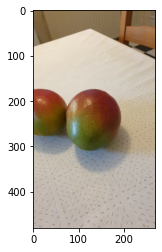

In [139]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
# print(input_tensor)
detections = detect_fn(input_tensor)

# print(detections)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()